In [1]:
import numpy as np
from numba import jit
from timeit import timeit
import matplotlib.pyplot as plt

In [2]:
# Luo vektorit NumPy-pohjaista ajonottoa varten.

a_array = np.random.randn(10**3)
b_array = np.random.randn(10**3)

# Luo listat Python-pohjaista ajonottoa varten.

a_list = list(a_array)
b_list = list(b_array)

In [3]:
# Tulostetaan kaikista ensimmäiset 10, jotta nähdään, että sisältävät lukuja. 

print("NumPy a_array (head):\n", a_array[:10])
print("NumPy b_array (head):\n", b_array[:10])
print("\na_list (head):\n", a_list[:10])
print("\nb_list (head):\n", b_list[:10])

NumPy a_array (head):
 [-0.2742843   0.15796679  0.56730787  1.84619737 -0.22081612 -1.00940158
  1.46790231  0.72815418  1.18520635 -1.65851292]
NumPy b_array (head):
 [ 0.55158152 -0.70936082  1.20928849 -0.97845958  0.04855829  0.40013748
  0.24428458 -1.29908161 -0.12894304 -1.81491343]

a_list (head):
 [-0.27428430221324374, 0.15796679339520175, 0.5673078725010805, 1.8461973702103114, -0.2208161205651782, -1.0094015809711863, 1.467902310228312, 0.7281541811288946, 1.1852063453037793, -1.658512920625028]

b_list (head):
 [0.5515815224557072, -0.7093608223046496, 1.2092884925437675, -0.9784595776312073, 0.04855828510667322, 0.4001374817241671, 0.24428457742760948, -1.2990816076494254, -0.12894303721132505, -1.8149134307705663]


In [4]:
def dot(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [5]:
@jit(nopython=True)
def dot_numba(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [6]:
@jit(nopython=True)
def dot_np_numba(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    return np.dot(a, b)

In [7]:
# dot-funktion ajo listoilla 
list_time = timeit(lambda: dot(a_list, b_list), number=10000)

print((list_time * 1000), "ms")

2157.5659999999743 ms


In [8]:
# Vertailun vuoksi saman dot-funktion ajo NumPy-taulukoilla.
np_arr_time = timeit(lambda: dot(a_array, b_array), number=10000)

print((np_arr_time * 1000), "ms")

3077.8809999999908 ms


In [9]:
# Numban ensimmäinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print((numba_time * 1000), "ms")

296.70010000000957 ms


In [27]:
# Numban toinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print((numba_time * 1000), "ms")

27.126000000066597 ms


In [28]:
# NumPyn oma dot-operaatio
numpy_time = timeit(lambda: np.dot(a_array, b_array), number=10000)

print((numpy_time * 1000), "ms")

32.62780000000021 ms


In [12]:
# Numba + NumPy ensimmäinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print((numba_plus_numpy_time * 1000), "ms")

167.530700000043 ms


In [24]:
# Numba + NumPy toinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print((numba_plus_numpy_time * 1000), "ms")

8.67849999997361 ms


In [32]:
# Lasketaan nopeutuskertoimet verrattuna Pythonin list-toteutukseen

numba_x = list_time / numba_time
numpy_x = list_time / numpy_time
numba_plus_numpy_x = list_time / numba_plus_numpy_time

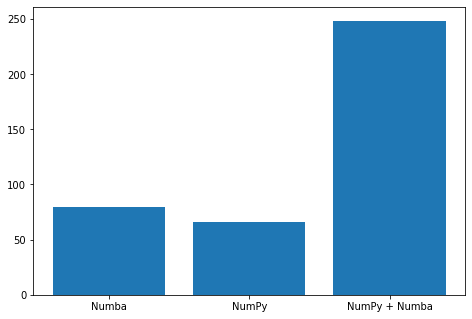

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Numba', 'NumPy', 'NumPy + Numba']
students = [numba_x, numpy_x, numba_plus_numpy_x]
ax.bar(langs,students)
plt.show()

In [ ]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, labels=['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()